#SD204  TP SVD-PCA

In [15]:
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
plt.close()

###Exercice 1. Retour sur l’algèbre linéaire
####Question (1)

In [16]:
mu, sigma= 0, 2
lam = 1e-5
#(a)
n, p = 100,2000
X = sigma * np.random.randn(n,p) + mu  # X
y = np.random.uniform(-1,1,n)          # y
Id_n = np.identity(n)                  # Unit vector Id_n
Id_p = np.identity(p)                  # Unit vector Id_p 
timeS = time.time()
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
timeE = time.time()
time_1L = timeE - timeS                  #the run time of the method on left (1)
timeS = time.time()
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
timeE = time.time()
time_1R = timeE - timeS                  #the run time of the method on right (1)
result = np.allclose(left,right)
print("(a) Avec n = 100 et p = 2000, la gauche et la droite sont égales ?")
print result

#(b)
n, p = 2000,100
X = sigma * np.random.randn(n,p) + mu 
y = np.random.uniform(-1,1,n)       
Id_n = np.identity(n)               
Id_p = np.identity(p)                  
timeS = time.time()
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
timeE = time.time()
time_2L = timeE - timeS                  #the run time of the method on left (2)
timeS = time.time()
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
timeE = time.time()
time_2R = timeE - timeS                  #the run time of the method on right (2)
result = np.allclose(left,right)
print("(b) Avec n = 2000 et p = 100, la gauche et la droite sont égales ?")
print result

(a) Avec n = 100 et p = 2000, la gauche et la droite sont égales ?
True
(b) Avec n = 2000 et p = 100, la gauche et la droite sont égales ?
True


&emsp;À partir de ces resultats, on voit que l'équation suivante est vraie:
$$X^T(XX^T+{\lambda}Id_n)^{-1}y=(X^TX+{\lambda}Id_p)^{-1}X^Ty$$

####Question (2)  
&emsp;Ici on compare le temps d'exécution des méthode gauche et méthode droite selon la taille de n et p:

In [14]:
print("(a) Pour n = 100, p = 2000:")
print("Le temps d'exécution pour la méthode gauche est %f" %time_1L)
print("Le temps d'exécution pour la méthode droite est %f" %time_1R)
print("(b) Pour n = 2000, p = 100:")
print("Le temps d'exécution pour la méthode gauche est %f" %time_2L)
print("Le temps d'exécution pour la méthode droite est %f" %time_2R)

(a) Pour n = 100, p = 2000:
Le temps d'exécution pour la méthode gauche est 0.003000
Le temps d'exécution pour la méthode droite est 0.565000
(b) Pour n = 2000, p = 100:
Le temps d'exécution pour la méthode gauche est 0.532000
Le temps d'exécution pour la méthode droite est 0.003000


&emsp;On voit que quand on utilise la dimention de 2000, le temps d'exécution est beaucoup plus grand que la dimention de 100. Donc on choisit l'une plus petite parmi n et p pour l’astuce du noyau.

###Exercice 2. Spectre de matrice aléatoire
####Question (3)
Pour cette question, la loi de poisson et la loi exponentielle sont choisies. Les moyennes sont mis nulle par moins 1 pour chaque élément dans une matrice comme ci-dessous:

In [4]:
n,p = 1000,200
X_poi = np.random.poisson(1, size = (n,p)) - 1
X_exp = np.random.exponential(1,size = (n,p)) - 1

####Question (4) Les valeur singulière

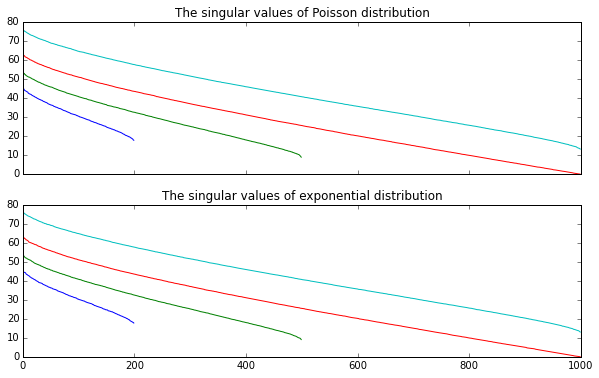

In [5]:
import matplotlib.pyplot as plt
n = 1000
p_array = [200,500,1000,2000]
'''
figure,ax = plt.subplots(2, sharex = True)
for p in p_array:
    X_gam = np.random.gamma(shape = 4, scale = 0.5, size = (n,p)) - 2
    s_gam = np.linalg.svd(X_gam, full_matrices=1,compute_uv=0)
    ax[0].plot(s_gam)
for p in p_array:
    X_nor = np.random.randn(n,p)
    s_nor = np.linalg.svd(X_nor, full_matrices=1,compute_uv=0)
    ax[1].plot(s_nor)
'''
fig, axes = plt.subplots(2,1, sharex = True, figsize=(10,6))
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    s_poi = np.linalg.svd(X_poi, full_matrices=1,compute_uv=0)
    axes[0].plot(s_poi)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    s_exp = np.linalg.svd(X_exp, full_matrices=1,compute_uv=0)
    axes[1].plot(s_exp)
axes[0].set_title("The singular values of Poisson distribution")
axes[1].set_title("The singular values of exponential distribution")
plt.show()

####Question (5) Valeurs propres

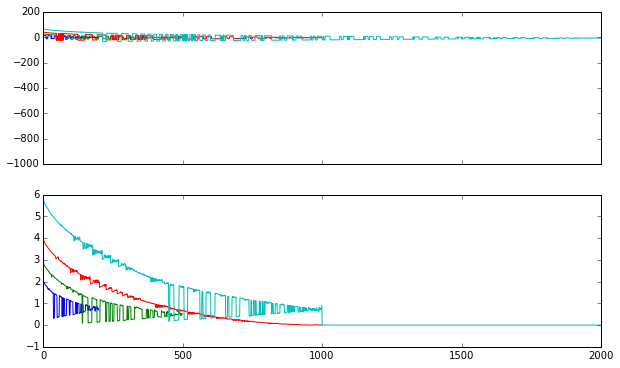

'\nQuestion: I import np and sp, which both contains linalg, but why np.linalg, not sp.linalg?\n'

In [7]:
fig, axes = plt.subplots(2,1, sharex = True, figsize=(10,6))
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    X = np.dot(X_poi.T,X_poi)/n
    evals, evecs = np.linalg.eig(X)
    axes[0].plot(evals)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    X = np.dot(X_exp.T,X_exp)/n
    evals, evecs = np.linalg.eig(X)
    axes[1].plot(evals)
plt.show()
'''
Question: I import np and sp, which both contains linalg, but why np.linalg, not sp.linalg?
'''

In [ ]:
#a = np.ones(shape=(5,2))
#a = np.matrix('1 2 3 4;5 6 7 8;9 8 7 6;5 4 3 2')     #<class 'numpy.matrixlib.defmatrix.matrix'>
'''
a = np.array([[1,2,3,4], 
              [5,6,7,8],
              [9,8,7,6],
              [5,4,3,2.]])   #<type 'numpy.ndarray'>
evals, evecs = np.linalg.eig(a)
print a.T*a/5
print type(a.T*a/5)
b = np.array([1,0,1,0])
np.linalg.norm(b)
c = np.ones((4,4))
print np.subtract(a,c)
'''
X = np.random.randn(3,4)
print X
print X[]

###Exercice 3. Méthode de la puissance itérée

#plt.setp(lines, linewidth=2, color='r') 

####Question (6) et (7)
Pour la matrice $X \in \Bbb{R}^{p\times{n}}$ , $u \in \Bbb{R}^{p\times{1}}$ et $v \in \Bbb{R}^{n\times{1}}$ sont choisis aléatoirement comme les vecteurs initiaux.<br>
Pour la question ci-dessous:<br>
- u_SVD est la matrice obtenue par la méthode np.linalg.svd<br>
- u est le vecteur obtenu par la méthode de la puissance itérée<br>
<br>
Quelques fois on obtient des vecteurs qui sont dans la direction contraire du résultat de méthode SVD, tel que (v–v_svd) soit grand plutôt que approche zéro.  Une méthode 'equalToSVD' est établi pour résoudre ce problème.

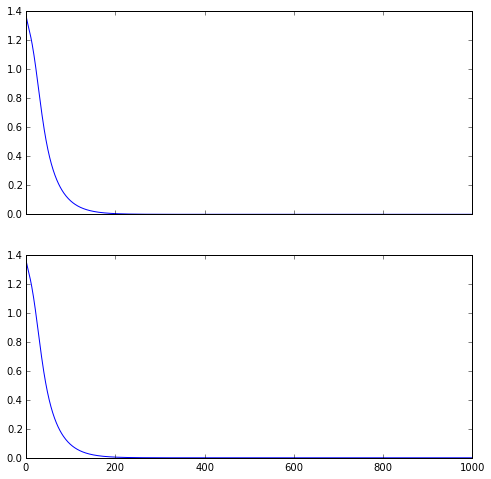

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
plt.close()

# This function is for Question (7)
# Find the difference of v and v_svd according to their directions
# Input: vecteur v and vecteur got by SVD v_svd(with shape (n,1))
def equalToSVD(v,v_svd): 
    test_sub = abs(np.subtract(v,v_svd))
    test_add = abs(np.add(v,v_svd))
    if(np.mean(test_sub) < np.mean(test_add)): #The vectors v and v_svd are in the same direction
        result = np.linalg.norm(np.subtract(v,v_svd))
    else: #v and v_svd are in the oppesite direction
        result = np.linalg.norm(np.add(v,v_svd))
    return result       # Return: [float]

# Function: Power Iteration
def powerIteration(X,n_iter,u0,v0):     #X: (p,n)
    u = u0
    v = v0
    # Question (7)
    identi_u = np.zeros(n_iter)
    identi_v = np.zeros(n_iter)
    # Question (6)
    # Get the shape of matrix X:
    p,n = X.shape[0],X.shape[1]         # X: (p*n) 
    for j in range(0,n_iter):
        u = np.dot(X,v)
        v = np.dot(X.T,u)
        u = u*(1/np.linalg.norm(u))
        v = v*(1/np.linalg.norm(v))
        # The folowing lines are for Question (7)
        identi_u[j] = equalToSVD(u,u_svd)
        identi_v[j] = equalToSVD(v,v_svd)
        # End of code for Question (7)
    return u,v,identi_u,identi_v

n, p = 100,2000
X = np.random.randn(p,n)*2
n_iter = 1000
# SVD
u_SVD,s,v_SVD = np.linalg.svd(X, full_matrices=1,compute_uv=1)
u_svd = u_SVD.T[0].reshape((p,1))
v_svd = v_SVD[0].reshape((n,1))
# puissance itérée
u0 = np.random.randn(p,1)   
v0 = np.random.randn(n,1)
#u0 = np.ones((p,1))
#v0 = np.ones((n,1))
# Call the function
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
fig, axes = plt.subplots(2,1, sharex = True, figsize=(8,8))
axes[0].plot(identi_u)
axes[1].plot(identi_v)
plt.show()

####Question (8)
Trois types des vecteurs initiaux sont appliqués dans cette question, ils sont:
- vecteur de la loi normal
- vecteur de ones
- (1,0,0,0,0......)

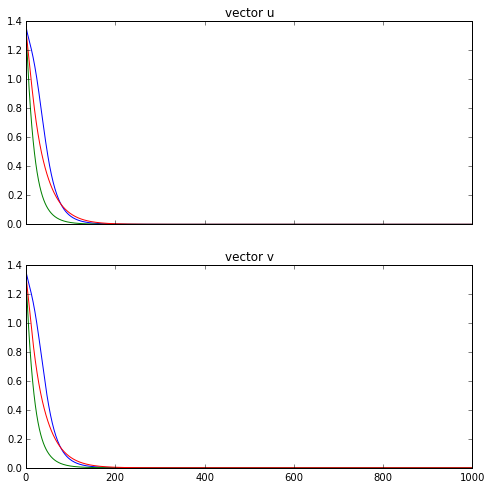

In [3]:
fig, axes = plt.subplots(2,1, sharex = True, figsize=(8,8))
# a.random
u0 = np.random.randn(p,1)   
v0 = np.random.randn(n,1)
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'b')
axes[1].plot(identi_v,'b')
# b.ones
u0 = np.ones((p,1))
v0 = np.ones((n,1))
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'g')
axes[1].plot(identi_v,'g')
# c.uniform
u0 = np.zeros((p,1))
u0[0] = 1
v0 = np.zeros((n,1))
v0[0] = 1
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'r')
axes[0].set_title("vector u")
axes[1].plot(identi_v,'r')
axes[1].set_title("vector v")
plt.show()

####Question (9)

In [5]:
s = np.dot(np.dot(u.T, X),v)[0][0]  #<type 'numpy.float64'>
X_2 = np.subtract(X,s*np.dot(u,v.T))
u_2,v_2,_,_ = powerIteration(X_2,n_iter,u0,v0)
s_2 = np.dot(np.dot(u_2.T, X_2),v_2)[0][0]
print("La valeur singulière la plus grande obtenu pas Question(6) est: %f" %s)
print("La seconde valeur singulière la plus grande est: %f" %s_2)

La valeur singulière la plus grande obtenu pas Question(6) est: 108.894009
La seconde valeur singulière la plus grande est: 107.295324


###Exercice 4. PCA

####(10), (11) (12) et (13)

(10)


,Unnamed: 0,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


(12)


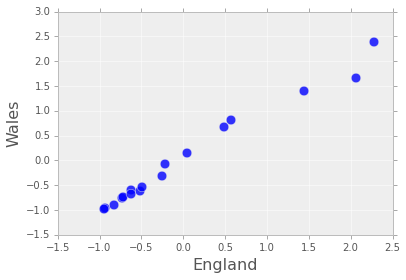

(13)


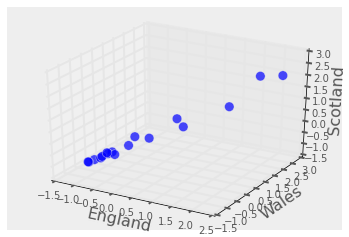

In [43]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.figure import Figure
%matplotlib inline

# (10)
df = pd.read_csv('defraconsumption.csv',sep = ";")
print("(10)")
display(df)

# (11)
X_row = df.as_matrix(columns = df.columns[1:]).astype(float)
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_row)
X = scaler.transform(X_row)

# (12)
print("(12)")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=90, alpha = 0.8)  #s: size of points
plt.xlabel('England',fontsize = 16)
plt.ylabel('Wales',fontsize = 16)
plt.show()

# (13)
print("(13)")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 90, alpha = 0.7)
ax.set_xlabel('England',fontsize = 16)
ax.set_ylabel('Wales',fontsize = 16)
ax.set_zlabel('Scotland',fontsize = 16)
plt.show()